In [86]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Задание по numpy
1. Напишите свой аналог np.linspace с использованием цикла и с использованием list comprehension. Сравните все три варианта по производительности
1. Сравните по производительности основные операции с массивами (array) numpy и с list

In [31]:
def my_linspace_list(l, h, s):
    return [x for x in np.arange(l, h, (h - l) / float(s))]

def my_linspace_loop(l, h, s):
    ans = np.zeros(s)
    for i in np.arange(s):
        ans[i] = l + ((h - l) / s) * i
    return ans

In [32]:
%timeit np.linspace(-1, 1, 10000)
%timeit my_linspace_list(-1, 1, 10000)
%timeit my_linspace_loop(-1, 1, 10000)

The slowest run took 8.25 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 53 µs per loop
1000 loops, best of 3: 678 µs per loop
100 loops, best of 3: 5.28 ms per loop


## Задание по scipy
Попробуйте поменять метод оптимизации в примере решения оптимизационной задачи, и подобрать метод с наименьшим количеством вычислений функции. Начальное приближение оставьте тем же.

In [33]:
def f(x):
    return (x[0] - 3.2) ** 2 + (x[1] - 0.1) ** 2 + 3

print f([3.2, 0.1])



3.0


In [50]:
results = dict()
iter1 = minimize(f, [5, 5]).nit
results['default'] = iter1
iter2 = minimize(f, [5, 5], method='Nelder-Mead').nit
results['Nelder-Mead'] = iter2
iter3 = minimize(f, [5, 5], method='BFGS').nit
results['BFGS'] = iter3
iter4 = minimize(f, [5, 5], method='SLSQP').nit
results['SLSQP'] = iter4
iter5 = minimize(f, [5, 5], method='CG').nit
results['CG'] = iter5
iter6 = minimize(f, [5, 5], method='Powell').nit
results['Powell'] = iter6
iter7 = minimize(f, [5, 5], method='TNC').nit
results['TNC'] = iter7

ans = min(results, key=results.get)

print ans, results[ans]

SLSQP 2


## Задание по Matplotlib
1. Добавьте подписи к осям и легенду к примеру выше (см. документацию)
1. Постройте график с 5 разными элементарными функциями и сделайте легенду к графику в TeXe
1. Сохраните рисунок в файл строчкой кода на Python

In [54]:
def f1(x):
    return x

def f2(x):
    return x**2 - x

def f3(x):
    return np.sin(x**2) / x

def f4(x):
    return - x**3

def f5(x):
    return x + x**2 / 2 + x**3 / 4

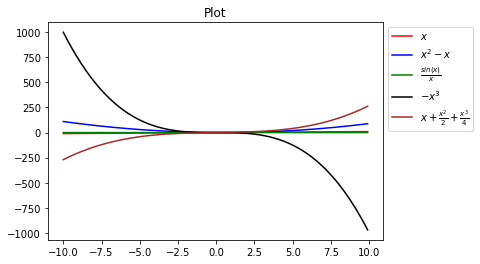

In [121]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f1(x), c='red', label='$x$')
plt.plot(x, f2(x), c='blue', label='$x^2 - x$')
plt.plot(x, f3(x), c='green', label='$ \\frac{sin(x)}{x} $')
plt.plot(x, f4(x), c='black', label='$-x^3$')
plt.plot(x, f5(x), c='brown', label='$x + \\frac{x^2}{2} + \\frac{x^3}{4}$')
plt.title('Plot')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('hw#5.png')
plt.show()

## Задание на Numpy+Matplotlib

1. Сгенерируйте массив из 500 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 2x - 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$
2. Сгенерируйте массив из 100 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$
3. Изобразите первый и второй массив точек на плоскости (используя два разных цвета), а также график функии $f(x) = 2x - 1$ (используя какой-нибудь третий цвет)

In [123]:
x1 = np.linspace(-1, 1, 500)

def y1(x):
    return 2 * x - 1 + np.random.normal(0, 0.1)

x2 = np.linspace(-1, 1, 100)
y2 = [1 + np.random.normal(0, 0.1) for i in range(100)]

def f(x):
    return 2 * x - 1

x = np.linspace(-1, 1, 1000)

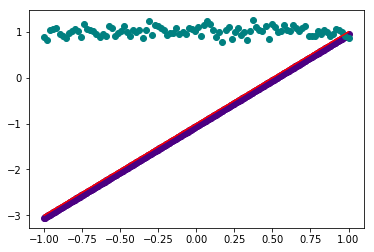

In [127]:
plt.plot(x1, y1(x1), 'o', c='indigo')
plt.plot(x2, y2, 'o', c='teal')
plt.plot(x, f(x), c='red')
plt.show()

In [124]:
x_all = np.hstack([x1, x2])
y_all = np.hstack([y1(x1), y2])

In [96]:
def poly(x, coeff):
    k, b = coeff
    return k * x + b

In [114]:
def loss_function_square(coeff):
    loss = sum((poly(x_all, coeff) - y_all) ** 2)
    return loss

def loss_function_abs(coeff):
    loss = sum(np.abs(poly(x_all, coeff) - y_all))
    return loss

In [115]:
result_square = minimize(loss_function_square, [0.1, 0.1])
result_abs = minimize(loss_function_abs, [0.1, 0.1])

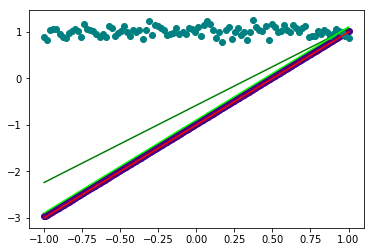

In [132]:
plt.plot(x1, y1(x1), 'o', c='indigo')
plt.plot(x2, y2, 'o', c='teal')
plt.plot(x, f(x), c='red')
plt.plot(x, poly(x, result_square.x), c='green')
plt.plot(x, poly(x, result_abs.x), c='lime')
plt.show()